# Problem Statement:
 - In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 - To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
 - In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.   

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 

In [3]:
# Reading the dataset
df = pd.read_csv('telecom_churn_data.csv')

In [4]:
# Checking the shape of the dataset
df.shape

(99999, 226)

In [5]:
# Finding the Percentage missing values
round(100*df.isnull().sum()/len(df),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

- From the above output there are columns who has more than 73% of missing values. So better to remove them before doing the analysis

In [6]:
# Dropping missing values greater than 70% from the dataset
df = df.dropna(thresh=0.7*len(df), axis=1)

In [7]:
round(100*df.isnull().sum()/len(df),2).sort_values(ascending=False)

loc_ic_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
std_ic_t2f_mou_9        7.75
std_ic_t2t_mou_9        7.75
roam_og_mou_9           7.75
loc_ic_mou_9            7.75
loc_og_t2t_mou_9        7.75
loc_ic_t2f_mou_9        7.75
roam_ic_mou_9           7.75
ic_others_9             7.75
loc_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
offnet_mou_9            7.75
loc_ic_t2t_mou_9        7.75
std_ic_mou_9            7.75
onnet_mou_9             7.75
og_others_9             7.75
std_og_mou_9            7.75
isd_ic_mou_9            7.75
std_og_t2m_mou_9        7.75
std_og_t2f_mou_9        7.75
loc_og_t2f_mou_9        7.75
std_og_t2c_mou_9        7.75
spl_ic_mou_9            7.75
isd_og_mou_9            7.75
loc_og_t2c_mou_9        7.75
spl_og_mou_9            7.75
loc_og_t2m_mou_9        7.75
std_ic_t2m_mou_9        7.75
spl_ic_mou_8            5.38
std_ic_t2f_mou_8        5.38
isd_ic_mou_8            5.38
std_ic_t2o_mou_8        5.38
loc_og_mou_8            5.38
loc_ic_t2f_mou

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


In [9]:
df.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0

In [10]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.0

- From the above output the below columns has only unique values, which is not useful for our analysis. So better to remove them
  - **circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7** and 
  - **std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9**

In [11]:
# Dropping unique value columns
df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7',
        'std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'], axis=1, inplace=True)

In [12]:
df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.00

# Exploratory Data Analysis

([array([9.9617e+04, 3.6900e+02, 7.0000e+00, 4.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00]),
  array([9.9593e+04, 3.9100e+02, 1.1000e+01, 1.0000e+00, 2.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
  array([9.9564e+04, 4.2200e+02, 8.0000e+00, 2.0000e+00, 1.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00]),
  array([9.9607e+04, 3.8000e+02, 7.0000e+00, 2.0000e+00, 2.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00])],
 array([-2258.709 ,  1847.7236,  5954.1562, 10060.5888, 14167.0214,
        18273.454 , 22379.8866, 26486.3192, 30592.7518, 34699.1844,
        38805.617 ]),
 <a list of 4 Lists of Patches objects>)

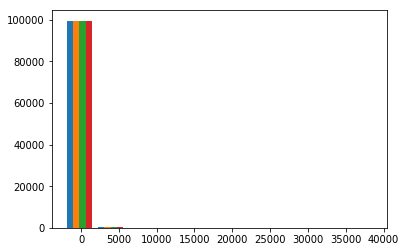

In [13]:
plt.hist([df['arpu_6'],df['arpu_7'],df['arpu_8'],df['arpu_9']])

- For all the customers, average revenue per use is in the same level for all the 4 months

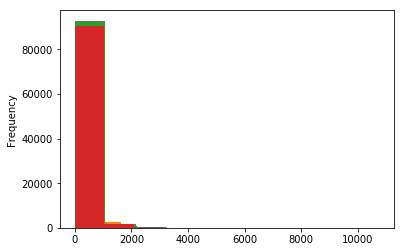

In [14]:
df['onnet_mou_6'].plot.hist()
df['onnet_mou_7'].plot.hist()
df['onnet_mou_8'].plot.hist()
df['onnet_mou_9'].plot.hist()

- Onnet_mou is following the same trend for all the four months for all users

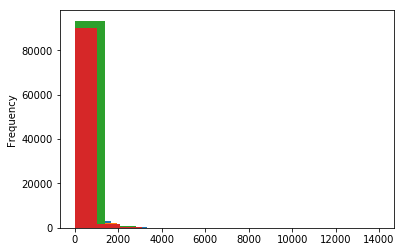

In [15]:
df['offnet_mou_6'].plot.hist()
df['offnet_mou_7'].plot.hist()
df['offnet_mou_8'].plot.hist()
df['offnet_mou_9'].plot.hist()

- Offnet_mou also following the same trend for all the 4 months for all users

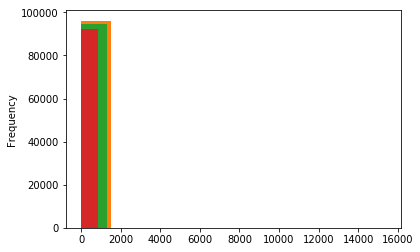

In [16]:
df['roam_ic_mou_6'].plot.hist()
df['roam_ic_mou_7'].plot.hist()
df['roam_ic_mou_8'].plot.hist()
df['roam_ic_mou_9'].plot.hist()

- roam incoming mou has the same patter for all the four months for all users

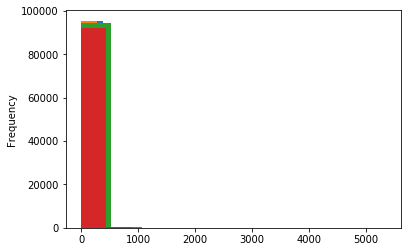

In [17]:
df['roam_og_mou_6'].plot.hist()
df['roam_og_mou_7'].plot.hist()
df['roam_og_mou_8'].plot.hist()
df['roam_og_mou_9'].plot.hist()

- roam outgoing mou has same pattern for all the four months

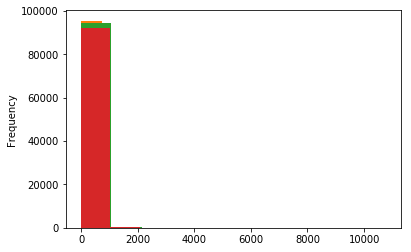

In [18]:
df['loc_og_t2t_mou_6'].plot.hist()
df['loc_og_t2t_mou_7'].plot.hist()
df['loc_og_t2t_mou_8'].plot.hist()
df['loc_og_t2t_mou_9'].plot.hist()

- local calls with in same network also follows similar trend for all the 4 months

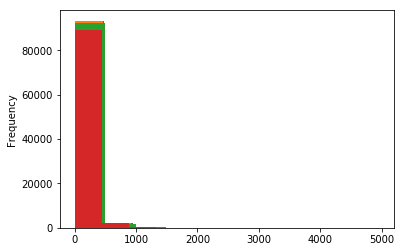

In [19]:
df['loc_og_t2m_mou_6'].plot.hist()
df['loc_og_t2m_mou_7'].plot.hist()
df['loc_og_t2m_mou_8'].plot.hist()
df['loc_og_t2m_mou_9'].plot.hist()

- local calls from operator to other networks also has same trend for all the 4 months

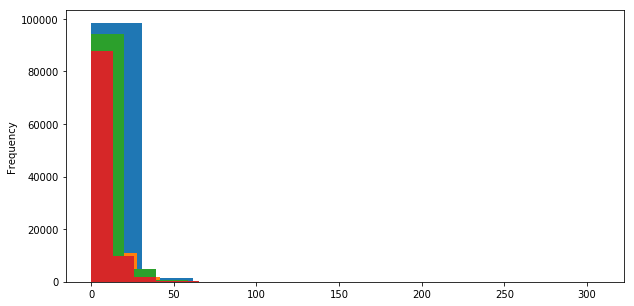

In [20]:
plt.figure(figsize=(10,5))
df['total_rech_num_6'].plot.hist()
df['total_rech_num_7'].plot.hist()
df['total_rech_num_8'].plot.hist()
df['total_rech_num_9'].plot.hist()

- Total recharge is decreasing for every month

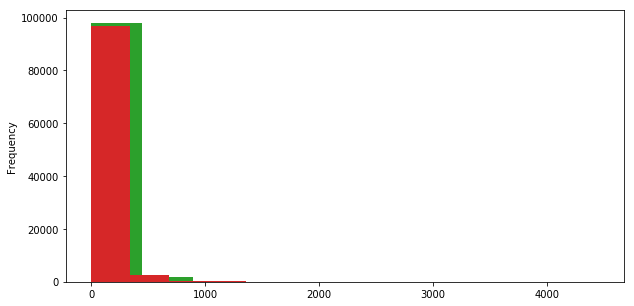

In [21]:
plt.figure(figsize=(10,5))
df['max_rech_amt_6'].plot.hist()
df['max_rech_amt_7'].plot.hist()
df['max_rech_amt_8'].plot.hist()
df['max_rech_amt_9'].plot.hist()

- Max recharge is following the decreasing trend for the months

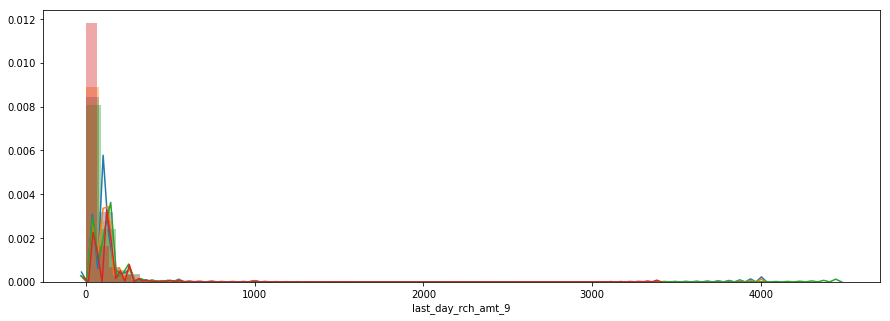

In [22]:
plt.figure(figsize=(15,5))
sns.distplot(df['last_day_rch_amt_6'])
sns.distplot(df['last_day_rch_amt_7'])
sns.distplot(df['last_day_rch_amt_8'])
sns.distplot(df['last_day_rch_amt_9'])

- Last day recharge amount is also following the decreasing trend for the months

# Identifying high value customers

In [23]:
# Calculating average of the total recharge amount for 6th and 7th month
df['avg'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [24]:
# Finding the 70th percentile value from the average column
df['avg'].describe(percentiles = [0.7])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
50%        229.000000
70%        368.500000
max      37762.500000
Name: avg, dtype: float64

- From above output,70th percentile value is 368.5

In [25]:
# Deriving High value customers as per the problem statement
df2 = df.loc[df['avg']>=368.5]

In [26]:
# finding the shape of the final dataset
df2.shape

(30011, 175)

- So, we have nearly 30k customers who belongs to high value customers category

In [27]:
# Deriving churn column
df2['churn'] = df2.apply(lambda x: 1 if ((x['total_ic_mou_9'] == 0) and (x['total_og_mou_9'] == 0) and (x['vol_2g_mb_9']==0) and (x['vol_3g_mb_9']==0)) else 0, axis=1)

In [28]:
df2['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [29]:
# Removing all the _9 columns which are related to target variable
df2.columns.tolist()
df2 = df2.drop(['last_date_of_month_9', 
 'arpu_9', 
 'onnet_mou_9', 
 'offnet_mou_9', 
 'roam_ic_mou_9', 
 'roam_og_mou_9', 
 'loc_og_t2t_mou_9', 
 'loc_og_t2m_mou_9', 
 'loc_og_t2f_mou_9', 
 'loc_og_t2c_mou_9', 
 'loc_og_mou_9', 
 'std_og_t2t_mou_9', 
 'std_og_t2m_mou_9', 
 'std_og_t2f_mou_9', 
 'std_og_mou_9', 
 'isd_og_mou_9', 
 'spl_og_mou_9', 
 'og_others_9', 
 'total_og_mou_9', 
 'loc_ic_t2t_mou_9', 
 'loc_ic_t2m_mou_9', 
 'loc_ic_t2f_mou_9', 
 'loc_ic_mou_9', 
 'std_ic_t2t_mou_9', 
 'std_ic_t2m_mou_9', 
 'std_ic_t2f_mou_9', 
 'std_ic_mou_9', 
 'total_ic_mou_9', 
 'spl_ic_mou_9', 
 'isd_ic_mou_9', 
 'ic_others_9', 
 'total_rech_num_9', 
 'total_rech_amt_9', 
 'max_rech_amt_9', 
 'date_of_last_rech_9', 
 'last_day_rch_amt_9', 
 'vol_2g_mb_9', 
 'vol_3g_mb_9', 
 'monthly_2g_9', 
 'sachet_2g_9', 
 'monthly_3g_9', 
 'sachet_3g_9',
 'sep_vbc_3g'],axis=1)

In [30]:
df2.head()

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg,churn
7,7000701601,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,1

In [31]:
# There are last_date of the month columns which has only one unique value. As it is not useful for our analysis better to
# remove them as well
df2 = df2.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

# Removing the last recharge date columns
df2 = df2.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

# Removing the derived average column
df2 = df2.drop(['avg'],axis=1)

In [32]:
# Finding the missing values
round(100*df2.isnull().sum()/len(df2),2).sort_values(ascending=False)

std_og_mou_8          3.13
loc_ic_t2t_mou_8      3.13
loc_og_t2f_mou_8      3.13
std_og_t2f_mou_8      3.13
loc_og_t2c_mou_8      3.13
loc_og_mou_8          3.13
std_og_t2t_mou_8      3.13
ic_others_8           3.13
isd_ic_mou_8          3.13
spl_ic_mou_8          3.13
og_others_8           3.13
std_og_t2m_mou_8      3.13
std_ic_mou_8          3.13
loc_ic_t2m_mou_8      3.13
std_ic_t2f_mou_8      3.13
std_ic_t2m_mou_8      3.13
std_ic_t2t_mou_8      3.13
loc_ic_t2f_mou_8      3.13
loc_og_t2m_mou_8      3.13
loc_ic_mou_8          3.13
loc_og_t2t_mou_8      3.13
offnet_mou_8          3.13
isd_og_mou_8          3.13
roam_og_mou_8         3.13
spl_og_mou_8          3.13
roam_ic_mou_8         3.13
onnet_mou_8           3.13
spl_og_mou_6          1.05
spl_ic_mou_6          1.05
std_og_t2m_mou_6      1.05
offnet_mou_6          1.05
loc_og_t2m_mou_6      1.05
std_ic_mou_6          1.05
loc_ic_t2m_mou_6      1.05
loc_ic_t2f_mou_6      1.05
std_ic_t2f_mou_6      1.05
std_og_t2f_mou_6      1.05
s

In [33]:
 # Filling missing values with Median
df2 = df2.fillna(df2.median())

In [34]:
# Finding the missing values
round(100*df2.isnull().sum()/len(df2),2).sort_values(ascending=False)

churn                 0.0
spl_og_mou_6          0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_8      0.0
std_og_mou_6          0.0
std_og_mou_7          0.0
std_og_mou_8          0.0
isd_og_mou_6          0.0
isd_og_mou_7          0.0
isd_og_mou_8          0.0
spl_og_mou_7          0.0
std_og_t2t_mou_6      0.0
spl_og_mou_8          0.0
og_others_6           0.0
og_others_7           0.0
og_others_8           0.0
total_og_mou_6        0.0
total_og_mou_7        0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_8      0.0
std_og_t2t_mou_7      0.0
loc_og_mou_8          0.0
jun_vbc_3g            0.0
roam_og_mou_7         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7 

- All the missing values are imputed with Median

In [35]:
df2.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89

# Checking and Treating Outliers 

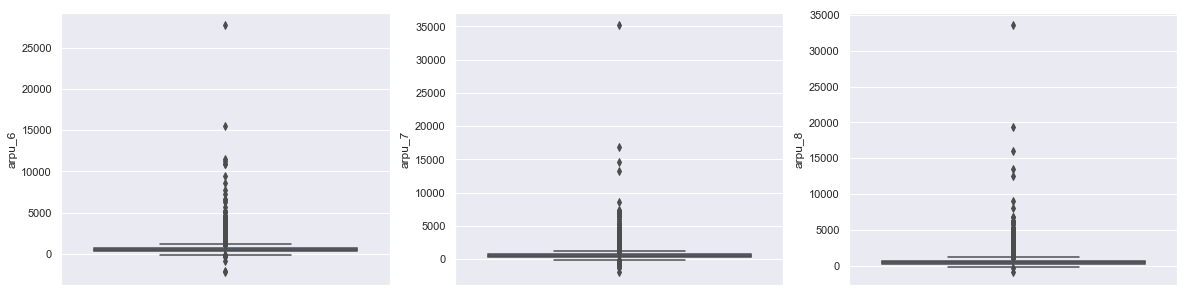

In [36]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,5))
sns.boxplot(data =df2,x='arpu_6',ax=ax[0],orient='v')
sns.boxplot(data =df2,x='arpu_7',ax=ax[1],orient='v')
sns.boxplot(data =df2,x='arpu_8',ax=ax[2],orient='v')

- From the above box plots, values till 12000 are acceptable for all the months but beyond is belongs to outliers. 
- There are few datapoints in negative also, which means few customers are not giving positive revenue

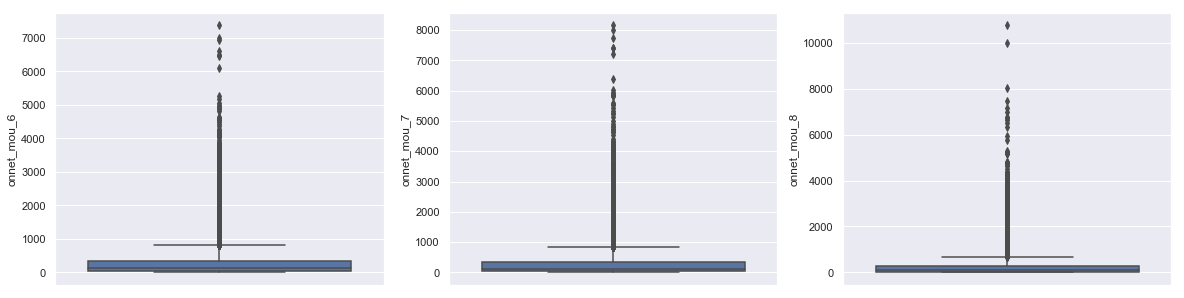

In [37]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,5))
sns.boxplot(data =df2,x='onnet_mou_6',ax=ax[0],orient='v')
sns.boxplot(data =df2,x='onnet_mou_7',ax=ax[1],orient='v')
sns.boxplot(data =df2,x='onnet_mou_8',ax=ax[2],orient='v')

- onnet_mou is increasing month by month, so it is in permissible value only

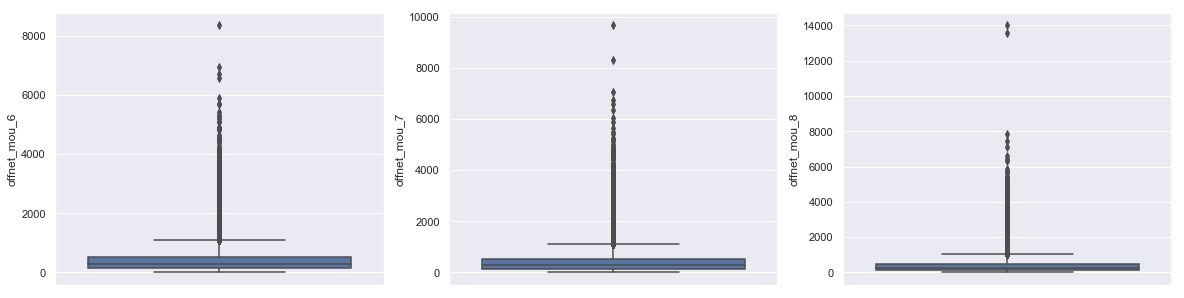

In [38]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,5))
sns.boxplot(data =df2,x='offnet_mou_6',ax=ax[0],orient='v')
sns.boxplot(data =df2,x='offnet_mou_7',ax=ax[1],orient='v')
sns.boxplot(data =df2,x='offnet_mou_8',ax=ax[2],orient='v')

- from the above offnet_mou is increasing month by month

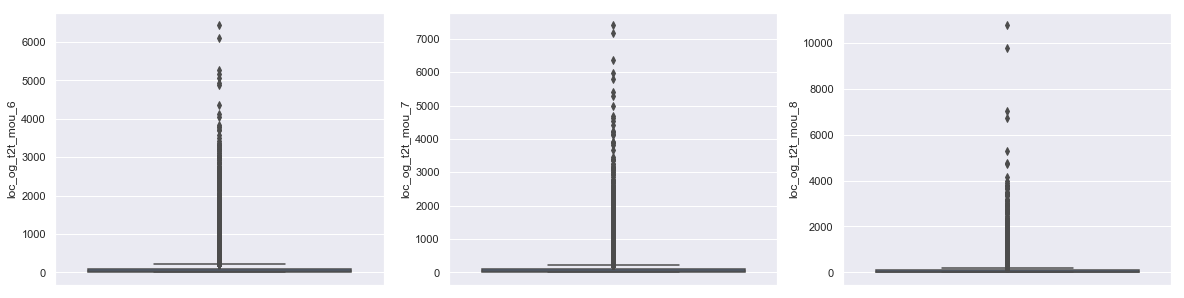

In [39]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,5))
sns.boxplot(data =df2,x='loc_og_t2t_mou_6',ax=ax[0],orient='v')
sns.boxplot(data =df2,x='loc_og_t2t_mou_7',ax=ax[1],orient='v')
sns.boxplot(data =df2,x='loc_og_t2t_mou_8',ax=ax[2],orient='v')


- From the above graphs, loc_og is decreased in the august month

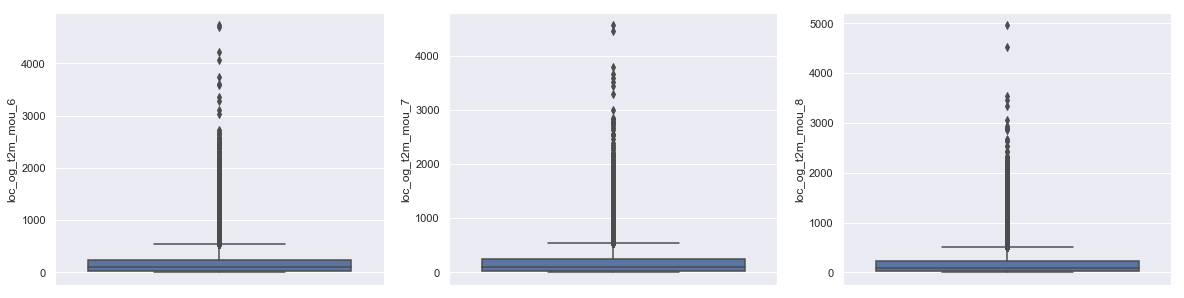

In [40]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,5))
sns.boxplot(data =df2,x='loc_og_t2m_mou_6',ax=ax[0],orient='v')
sns.boxplot(data =df2,x='loc_og_t2m_mou_7',ax=ax[1],orient='v')
sns.boxplot(data =df2,x='loc_og_t2m_mou_8',ax=ax[2],orient='v')

- from the above graphs, loc_og_t2m is decrease in the last month

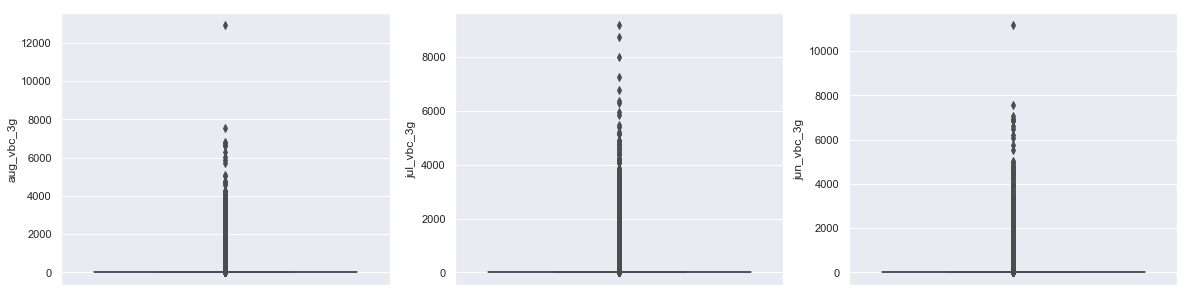

In [41]:
sns.set(style="darkgrid")
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,5))
sns.boxplot(data =df2,x='aug_vbc_3g',ax=ax[0],orient='v')
sns.boxplot(data =df2,x='jul_vbc_3g',ax=ax[1],orient='v')
sns.boxplot(data =df2,x='jun_vbc_3g',ax=ax[2],orient='v')

- From the above graphs volume based cost is decrease on august month

- So Overall all the columns has the reasonable values only but they are beyond the 75th percentile values. So let's keep them all the values without deleting and will apply scaling to bring them under same scale

In [42]:
df2.head(1)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.0,422.16,533.91,255.79,4.3,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.5,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1


In [43]:
# Seperating X and y variables
X = df2.drop(['mobile_number','churn'], axis=1)
y = df2['churn']

In [44]:
X.head(3)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.0,0.0,4.78,0.0,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00


In [45]:
y.head(3)

7     1
8     0
13    0
Name: churn, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE and select 15 variablesj
from sklearn.feature_selection import RFE

# Import statsmodels
import statsmodels.api as sm

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify=y)

In [48]:
# Scaling variables
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [49]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,-0.294502,-0.677186,0.377798,0.336840,1.571743,0.759888,-0.472485,-0.560749,-0.454145,-0.224220,-0.178899,2.568651,-0.250221,-0.230577,6.221978,-0.250504,-0.361523,-0.369328,-0.351793,-0.629081,-0.715908,-0.298482,-0.304589,-0.314175,0.791469,3.053607,-0.108258,-0.406040,-0.664013,-0.720239,0.552813,1.980560,-0.124443,-0.294940,-0.309461,-0.363279,-0.158950,-0.150176,-0.149464,0.165543,1.112781,-0.334397,-0.047318,-0.047649,-0.044251,0.876438,2.484866,0.066466,-0.305884,-0.015801,-0.016977,-0.055406,0.762233,-0.664375,-0.379518,-0.418178,-0.435499,-0.610474,-0.554842,-0.659052,-0.347976,-0.348823,-0.345965,-0.677048,-0.663939,-0.742680,0.042038,0.346979,0.119417,-0.146039,0.594356,-0.031167,-0.070824,-0.147074,-0.130111,-0.090713,0.606454,0.015230,-0.647448,-0.353714,-0.643769,-0.418826,-0.097074,-0.247695,-0.163843,-0.153941,-0.159484,-0.080409,-0.091613,-0.092167,-0.746581,-0.298447,-0.231982,-0.201837,-0.584153,0.328581,0.147906,-0.265551,0.393674,0.161725,0.159984,0.382502,-0.282176,-0.278915,-0.187628,1.182434,-0.240465,0.025740,2.352265,-0.336887,2.499145,-0.292936,0.215918,-0.329808,-0.30509,-0.297591,-0.298048,-0.163195,-0.156770,-0.145060,-1.101010,0.430741,-0.331686,-0.307203
1,0.400833,0.619258,0.283041,2.254268,2.145424,1.808892,-0.542771,-0.459267,-0.526616,-0.224220,-0.178899,-0.180417,-0.250221,-0.230577,-0.213706,0.400550,0.483912,0.397898,-0.495774,-0.355371,-0.510493,-0.270595,-0.299101,-0.314175,-0.219237,-0.206259,-0.234611,-0.098814,0.063113,-0.105610,2.328877,2.144440,1.835141,-0.232545,-0.250074,-0.239344,-0.158950,-0.150176,-0.149464,1.402612,1.263259,1.047421,-0.047318,-0.047649,-0.044251,-0.169525,-0.006399,-0.091766,1.087573,-0.015801,-0.016977,1.226553,1.211426,0.895504,0.132936,0.219926,0.185949,-0.472273,-0.404747,-0.477014,-0.325052,-0.348823,-0.345965,-0.318200,-0.225139,-0.302741,-0.096052,-0.081063,0.258007,-0.266393,-0.312703,-0.284517,-0.141567,-0.147074,-0.130111,-0.266479,-0.293458,-0.104976,-0.408888,-0.341712,-0.318330,-0.418826,-0.097074,-0.247695,-0.163843,-0.153941,-0.159484,-0.080409,-0.091613,-0.092167,0.743399,0.655021,0.614784,0.467215,0.455451,0.305649,-0.357557,-0.365670,-0.110482,0.034817,0.031785,-0.323510,-0.282176,-0.278915,-0

# Model Building

In [71]:
# Logistic regression model
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial(),random_state=100)
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4553.2
Date:                Sat, 25 Jan 2020   Deviance:                       9106.3
Time:                        15:51:36   Pearson chi2:                 7.65e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8269      0.062    -61.319      0.000      -3.949      -3.705
arpu_7                 0.3651      0.034     10.700      0.000       0.298       0.432
onnet_mou_8            0.0701      0.062      1.132      0.257      -0.051       0.191
offnet_mou_8           0.1335      0.067      1.994      0.046       0.002       0.265
std_og_mou_8          -0.3596      0.084     -4.297      0.000      -0.524      -0.196
loc_ic_mou_8          -1.5118      0.093    -16.245      0.000      -1.694      -1.329
std_ic_mou_8          -0.6056      0.096     -6.306      0.000      -0.794      -0.417
total_ic_mou_7         0.1129      0.052      2.192      0.028       0.012       0.214
spl_ic_mou_8          -0.6414      0.089     -7.233      0.000      -0.815      -0.468
total_rech_num_8      -1.1241      0.057    -19.587      0.000      -1.237      -1.012
last_day_rch_amt_8    -1.3610      0.070    -19.525      0.000      -1.498      -1.224
monthly_2g_8          -0.6518      0.072     -9.023      0.000      -0.793      -0.510
monthly_3g_8          -0.6787      0.077     -8.849      0.000      -0.829      -0.528
======================================================================================
"""

- From the above model output, coefficients of few variables are very high due to multi-collinearity and p-value is also high. So will apply Recursive feature elimination to select the most important 15 features

In [72]:
rfe = RFE(logreg, 15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
# Let's take a look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('std_og_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_mou_8', True, 1),
 ('total_ic_mou_7', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('monthly_2g_8', True, 1),
 ('monthly_3g_8', True, 1)]

In [74]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [75]:
# Select only the columns selected by RFE
X_train = X_train[col]

In [76]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
X_train_sm = sm.add_constant(X_train)


In [78]:
logm1 = sm.GLM(list(y_train), X_train_sm, family = sm.families.Binomial(),random_state=100)

res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4553.2
Date:                Sat, 25 Jan 2020   Deviance:                       9106.3
Time:                        15:53:30   Pearson chi2:                 7.65e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8269      0.062    -61.319      0.000      -3.949      -3.705
arpu_7                 0.3651      0.034     10.700      0.000       0.298       0.432
onnet_mou_8            0.0701      0.062      1.132      0.257      -0.051       0.191
offnet_mou_8           0.1335      0.067      1.994      0.046       0.002       0.265
std_og_mou_8          -0.3596      0.084     -4.297      0.000      -0.524      -0.196
loc_ic_mou_8          -1.5118      0.093    -16.245      0.000      -1.694      -1.329
std_ic_mou_8          -0.6056      0.096     -6.306      0.000      -0.794      -0.417
total_ic_mou_7         0.1129      0.052      2.192      0.028       0.012       0.214
spl_ic_mou_8          -0.6414      0.089     -7.233      0.000      -0.815      -0.468
total_rech_num_8      -1.1241      0.057    -19.587      0.000      -1.237      -1.012
last_day_rch_amt_8    -1.3610      0.070    -19.525      0.000      -1.498      -1.224
monthly_2g_8          -0.6518      0.072     -9.023      0.000      -0.793      -0.510
monthly_3g_8          -0.6787      0.077     -8.849      0.000      -0.829      -0.528
======================================================================================
"""

- From the above output, P-Values for onnet_mou_8 variable is high.

In [79]:
# Dropping high vif value variable
X_train.drop('onnet_mou_8', axis = 1, inplace = True)

In [80]:
# Refit the model with the new set of features
logm2 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial(),random_state=100)
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20995
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4553.8
Date:                Sat, 25 Jan 2020   Deviance:                       9107.6
Time:                        15:55:03   Pearson chi2:                 7.96e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8214      0.062    -61.516      0.000      -3.943      -3.700
arpu_7                 0.3699      0.034     10.875      0.000       0.303       0.437
offnet_mou_8           0.0933      0.058      1.622      0.105      -0.019       0.206
std_og_mou_8          -0.2929      0.061     -4.838      0.000      -0.412      -0.174
loc_ic_mou_8          -1.4807      0.089    -16.686      0.000      -1.655      -1.307
std_ic_mou_8          -0.6085      0.096     -6.336      0.000      -0.797      -0.420
total_ic_mou_7         0.1095      0.051      2.129      0.033       0.009       0.210
spl_ic_mou_8          -0.6440      0.089     -7.260      0.000      -0.818      -0.470
total_rech_num_8      -1.1168      0.057    -19.608      0.000      -1.228      -1.005
last_day_rch_amt_8    -1.3517      0.069    -19.535      0.000      -1.487      -1.216
monthly_2g_8          -0.6534      0.072     -9.047      0.000      -0.795      -0.512
monthly_3g_8          -0.6818      0.077     -8.895      0.000      -0.832      -0.532
======================================================================================
"""

- From the above output, offnet_mou_8 variable has high p-value. 

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_ic_mou_7,2.81
3,loc_ic_mou_8,2.51
2,std_og_mou_8,1.94
1,offnet_mou_8,1.81
0,arpu_7,1.39
4,std_ic_mou_8,1.30
7,total_rech_num_8,1.30
8,last_day_rch_amt_8,1.20
10,monthly_3g_8,1.09
6,spl_ic_mou_8,1.02


In [82]:
# Dropping high p-value variable
X_train.drop('offnet_mou_8', axis = 1, inplace = True)

In [83]:
# Refit the model with the new set of features
logm3 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial(),random_state=100)
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20996
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4555.1
Date:                Sat, 25 Jan 2020   Deviance:                       9110.1
Time:                        15:56:22   Pearson chi2:                 4.97e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.8148      0.062    -61.664      0.000      -3.936      -3.694
arpu_7                 0.3784      0.034     11.127      0.000       0.312       0.445
std_og_mou_8          -0.2398      0.050     -4.768      0.000      -0.338      -0.141
loc_ic_mou_8          -1.4387      0.085    -17.010      0.000      -1.604      -1.273
std_ic_mou_8          -0.6068      0.096     -6.322      0.000      -0.795      -0.419
total_ic_mou_7         0.1051      0.051      2.044      0.041       0.004       0.206
spl_ic_mou_8          -0.6400      0.089     -7.229      0.000      -0.814      -0.467
total_rech_num_8      -1.1120      0.057    -19.536      0.000      -1.224      -1.000
last_day_rch_amt_8    -1.3454      0.069    -19.433      0.000      -1.481      -1.210
monthly_2g_8          -0.6548      0.072     -9.065      0.000      -0.796      -0.513
monthly_3g_8          -0.6849      0.077     -8.936      0.000      -0.835      -0.535
======================================================================================
"""

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_ic_mou_7,2.80
2,loc_ic_mou_8,2.43
0,arpu_7,1.35
1,std_og_mou_8,1.35
3,std_ic_mou_8,1.30
6,total_rech_num_8,1.30
7,last_day_rch_amt_8,1.19
9,monthly_3g_8,1.09
5,spl_ic_mou_8,1.02
8,monthly_2g_8,1.02


- Now all the above variables are having permissible p-value and vif values. These are the top variables which are explaining the customers churn.

In [85]:
# Keeping the same train columns in X_test
X_test = X_test[X_train.columns]

In [86]:
# Implementing Logistic Regression model to find the accuracy

# As it is class imbalance problem using class_weight to be balanced
logreg = LogisticRegression(class_weight='balanced',random_state=100 ) 
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on train set: 0.76
Accuracy of logistic regression classifier on test set: 0.75


In [87]:
# Evaluation model with Precision and Recall
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [88]:
# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      8226
           1       0.23      0.82      0.36       778

    accuracy                           0.75      9004
   macro avg       0.60      0.78      0.60      9004
weighted avg       0.91      0.75      0.80      9004



- As it is class imbalance problem and mainly we are trying to identify the customer churn. In this scenario Recall is very important metric than precision.
- We got very descent recall which is of 82% for churn and 74% for non-churn cases
- Overall we got 75% of accuracy in our model

In [89]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model
y_train_pred  = logm3.fit().predict(sm.add_constant(X_train)).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.010996
1,0,0.045440
2,0,0.012789
3,0,0.040378
4,0,0.008839


# Finding Optimal cutoff
- Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [90]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

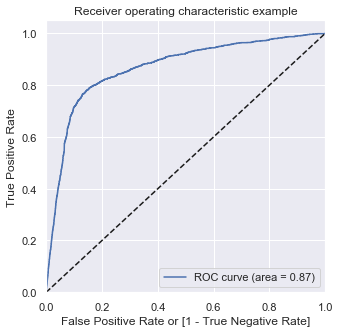

In [92]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [93]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.010996,1,0,0,0,0,0,0,0,0,0
1,0,0.045440,1,0,0,0,0,0,0,0,0,0
2,0,0.012789,1,0,0,0,0,0,0,0,0,0
3,0,0.040378,1,0,0,0,0,0,0,0,0,0
4,0,0.008839,1,0,0,0,0,0,0,0,0,0


In [94]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)



     prob  accuracy     sensi     speci
0.0   0.0  0.086400  1.000000  0.000000
0.1   0.1  0.790594  0.823691  0.787464
0.2   0.2  0.886609  0.699725  0.904283
0.3   0.3  0.906555  0.442975  0.950396
0.4   0.4  0.912981  0.238017  0.976813
0.5   0.5  0.914029  0.074380  0.993435
0.6   0.6  0.914219  0.022590  0.998541
0.7   0.7  0.913886  0.007163  0.999635
0.8   0.8  0.913648  0.002204  0.999844
0.9   0.9  0.913600  0.000551  0.999948


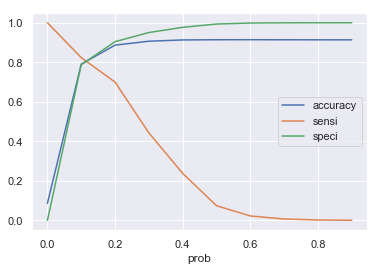

In [95]:
# Let's plot it as well
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


- From the above plot, approximately 0.1 is the optimum cut off point 

# Applying PCA

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify=y)

In [97]:
# Now scaling the numerical variables
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)

In [98]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [99]:
pca = PCA(random_state = 23)

In [100]:
pca.fit(X_train_new)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=23,
    svd_solver='auto', tol=0.0, whiten=False)

In [101]:
pca.components_

array([[ 1.30584657e-01,  1.44104288e-01,  1.51572488e-01, ...,
         5.49698428e-02,  4.79417836e-02,  4.41402895e-02],
       [ 1.07368358e-01,  1.36181249e-01,  1.22527861e-01, ...,
        -5.39487893e-02, -5.85153139e-02, -5.64134685e-02],
       [ 1.36794297e-01,  1.66426086e-01,  1.61527930e-01, ...,
         2.09504256e-01,  2.14960509e-01,  2.05039862e-01],
       ...,
       [ 2.23461756e-07, -3.06459252e-07, -5.82664738e-08, ...,
        -1.54388265e-07, -1.52057268e-07,  5.06578652e-08],
       [ 2.46150271e-08, -3.21300058e-08, -1.07209179e-07, ...,
         1.16549459e-08, -5.13833235e-08,  4.05611863e-08],
       [ 2.63530050e-07,  3.40675493e-07, -1.67915912e-07, ...,
         1.59568260e-08, -2.19394119e-08, -2.55268600e-08]])

In [102]:
pca.explained_variance_ratio_

array([9.89287031e-02, 8.75488049e-02, 5.64807522e-02, 4.76723190e-02,
       3.87765431e-02, 3.64863575e-02, 2.92199044e-02, 2.80096660e-02,
       2.72781594e-02, 2.53888217e-02, 2.41985322e-02, 2.31309506e-02,
       2.23672243e-02, 2.17590932e-02, 2.10080995e-02, 1.94927184e-02,
       1.66907378e-02, 1.63427336e-02, 1.55304802e-02, 1.49636930e-02,
       1.37509057e-02, 1.19092259e-02, 1.14795826e-02, 1.11917665e-02,
       1.04013811e-02, 1.00405220e-02, 9.64653344e-03, 9.44871207e-03,
       9.20583038e-03, 8.30775229e-03, 8.02951810e-03, 7.84642739e-03,
       7.59476295e-03, 7.42985862e-03, 7.01653115e-03, 6.74977042e-03,
       6.59053863e-03, 6.52679830e-03, 6.38709309e-03, 6.20477536e-03,
       5.88457797e-03, 5.86179726e-03, 5.72894370e-03, 5.31667494e-03,
       5.09092295e-03, 4.94642658e-03, 4.68305995e-03, 4.44263359e-03,
       4.13700402e-03, 4.03337725e-03, 3.95254259e-03, 3.85835227e-03,
       3.81967349e-03, 3.60712333e-03, 3.42535010e-03, 3.35987894e-03,
      

In [103]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

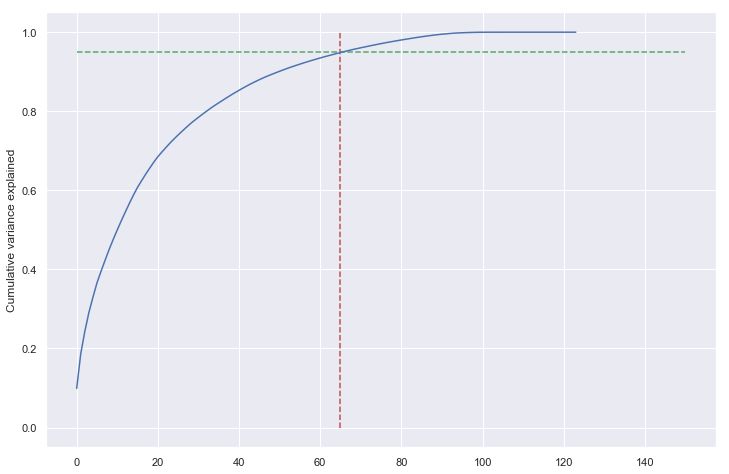

In [104]:
# Plotting scree plot to identify the number of Components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

- Totally 65 components are able to explain 95% of the variance from the dataset

In [105]:
pca_final = IncrementalPCA(n_components=65)

In [106]:
df_train_pca = pca_final.fit_transform(X_train_new)

In [107]:
df_train_pca.shape

(21007, 65)

In [108]:
df_train_pca[0]

array([-2.22369449,  1.63246643,  1.45230848,  0.69126957, -1.15620708,
        1.70048811,  0.86406749,  0.41924447,  0.17342393,  2.24963006,
        1.31469343,  1.43493647, -0.08923478,  1.35417602,  2.49357348,
       -1.23923613,  0.20200847, -0.20025908, -0.58931278,  0.26490135,
        1.36023006, -1.08665726,  0.95981527,  1.18164526,  0.98681125,
       -2.06290814, -1.09343715,  1.80446755, -0.02506757,  1.69330705,
       -0.75761939,  1.72000319, -0.13842462, -1.60885278,  0.58950653,
       -1.57711722, -0.7769394 ,  0.0669059 ,  0.19527512,  0.54235882,
       -1.69200035,  0.7800852 , -2.62592934, -0.7709064 ,  2.86404525,
        0.26704397,  1.81839201,  0.35304065,  0.29491083, -0.88289954,
       -1.6434769 , -1.68752862, -0.06421026,  0.99343979,  0.44328377,
       -0.2211078 ,  0.00714617, -0.32603023,  0.06588021,  0.46599094,
        0.01240742,  0.23537502,  0.13459   , -0.24989345,  0.19174987])

In [109]:
df_test_pca = pca_final.transform(X_test_new)

In [110]:
df_test_pca.shape

(9004, 65)

# Applying SMOTE and Ada Boost Classifier

In [127]:
from imblearn.over_sampling import SMOTE

In [139]:
# Applying Smote on PCA dataset to make it balance
smote = SMOTE(random_state=12)
x_train_res, y_train_res = smote.fit_sample(df_train_pca, y_train)

In [140]:
# Before applying smote
y_train.value_counts()

0    19192
1     1815
Name: churn, dtype: int64

In [141]:
# After applying smote both classes are getting balanced
y_train_res.value_counts()

1    19192
0    19192
Name: churn, dtype: int64

- So SMOTE makes classes to balance with the equal number

In [142]:
# Applying AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [143]:
# Fitting model
model_abc = AdaBoostClassifier(random_state=100)
model_abc.fit(x_train_res , y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [144]:
# Finding Accuracy
y_pred_train_abc = model_abc.predict(x_train_res)
y_pred_test_abc = model_abc.predict(df_test_pca)

print('Accuracy of AdaBoost classifier on train set: {:.2f}'.format(model_abc.score(x_train_res, y_train_res)))
print('Accuracy of AdaBoost classifier on test set: {:.2f}'.format(model_abc.score(df_test_pca, y_test)))


Accuracy of AdaBoost classifier on train set: 0.84
Accuracy of AdaBoost classifier on test set: 0.82


In [145]:
# Model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test_abc))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      8226
           1       0.29      0.76      0.42       778

    accuracy                           0.82      9004
   macro avg       0.63      0.79      0.66      9004
weighted avg       0.91      0.82      0.85      9004



- So, after balancing the dataset with SMOTE technique we got 82% accuracy in the unseen dataset(test dataset)
- We can able to generalize 82% non-churn and 76% churn cases from the unseen dataset

# Applying ADASYN and Adaboost Classifier

In [128]:
from imblearn.over_sampling import ADASYN

In [146]:
# Applying Smote on PCA dataset to make it balance
adasyn = ADASYN(random_state=12)
x_train_res, y_train_res = adasyn.fit_sample(df_train_pca, y_train)

In [147]:
# Values before applying ADASYN
y_train.value_counts()

0    19192
1     1815
Name: churn, dtype: int64

In [148]:
# Values after applying ADASYN
y_train_res.value_counts()

1    19731
0    19192
Name: churn, dtype: int64

- ADASYN doesn't make it balance to the equal number. It mainly tries to stabilize the data with balancing without equal number ratio

In [149]:
# Fitting model
model_abc = AdaBoostClassifier(random_state=100)
model_abc.fit(x_train_res , y_train_res)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [150]:
y_pred_train_abc = model_abc.predict(x_train_res)
y_pred_test_abc = model_abc.predict(df_test_pca)

print('Accuracy of Ada Boost classifier on train set: {:.2f}'.format(model_abc.score(x_train_res, y_train_res)))
print('Accuracy of Ada Boost classifier on test set: {:.2f}'.format(model_abc.score(df_test_pca, y_test)))


Accuracy of Ada Boost classifier on train set: 0.81
Accuracy of Ada Boost classifier on test set: 0.79


In [151]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Classification report to evaluate the results
print(classification_report(y_test, y_pred_test_abc))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8226
           1       0.26      0.78      0.39       778

    accuracy                           0.79      9004
   macro avg       0.62      0.79      0.63      9004
weighted avg       0.91      0.79      0.83      9004



- So, after balancing the dataset with ADASYN technique we got 79% accuracy in the unseen dataset(test dataset)
- We can able to generalize 79% non-churn and 78% churn cases from the unseen dataset

# Final Summary Results

- **Logistic Regression Model:**
    - We got 75% accuracy on un-seen dataset
    - From Recall we can identify 82% of Churn and 74% of Non-Churn cases

- **ADA Boost Classifier Using SMOTE:**
    - We got 82% accuracy on un-seen dataset
    - From Recall we can identify 76% of Churn and 82% of Non-Churn cases

- **ADA Boost Classifier Using ADASYN**
    - We got 79% accuracy on un-seen dataset
    - From Recall we can identify 78% of Churn and 79% of Non-Churn cases
    
- From the above models results, ADA Boost Classifier with ADASYN is giving good results to predict Churn Cases    

**Logistic Regression Coefficients Interpretation to identify the important features for churn:**

 - **Positives Coefficients:**
  - arpu_7	= 0.3784 => exp(0.378) = 1.45, which means Keeping all other predictors constant, then the odd ratio of Churn for  average revenue per user in 7th month is 1.45 times more likely to increase.
  - total_ic_mou_7 = 0.1051 => exp(0.10) = 1.10, which means Keeping all other predictors constant, then the odd ratio of Churn for  total incoming minutes of usage is 1.10 times more likely to increase.
  
 - **Negative Coefficients:**  
  - std_og_mou_8 =	-0.2398 => 1/exp(0.239) = 0.78, which means Keeping all other predictors constant, then the odd ratio of Churn for  std outgoing minutes of usage is 0.78 times more likely to decrease.
  - loc_ic_mou_8 = -1.4387 => 1/exp(1.438) = 0.23, which means 0.23 times more likely to decrease churn rate
  - std_ic_mou_8 =	-0.6068 => 1/exp(0.606) = 0.54, which means 0.54 times more likely to decrease churn rate
  - spl_ic_mou_8 =	-0.6400 => 1/exp(0.64) = 0.52,which means 0.52 times more likely to decrease churn rate
  - total_rech_num_8 = -1.1120 => 1/exp(1.11) = 0.32, which means 0.32 times more likely to decrease churn rate
  - last_day_rch_amt_8 = -1.3454 => 1/exp(1.34) = 0.26, which means 0.26 times more likely to decrease churn rate
  - monthly_2g_8 =	-0.6548 => 1/exp(0.65) = 0.52, which means 0.52 times more likely to decrease churn rate
  - monthly_3g_8 =	-0.6849 => 1/exp(0.68) = 0.50, which means 0.50 times more likely to decrease churn rate

# Recommended Strategies to manage customer Churn:

- Customer who has more total incoming minutes of usage instead of outgoing are more likely to churn.
- Customer who has less usage gradually are more likely to churn.
- Company can offer customer for few free outgoing calls with mininum price for a period will likely to retain customers. Having said that attracting new customer is very expensive process, so its better to retain the existing customers by giving them benefits.
- At the same time we have to keep the good customers also as they are very important on the basis of company revenue.
- So customers with more total recharge amount, monthly 3g usage, special incoming minutes of usage are more likely to stay in the network. So we should also consider them to stay in long term by giving them to do the recharge of 3 months, 6 months pack, etc.. So that company can have atleast guarantee that those customers will stay for that particular period. Eventhough they did churn then company won't loose much from them as they already paid in advance.
